<a href="https://colab.research.google.com/github/herysedra/covid19-mankaiza-clone/blob/andrana/scripts/paper/simple_blocks/sir_vmiv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import pickle

import pymc3 as pm
import theano.tensor as tt
import theano
import datetime
import time


import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns


cco_cases_mdg = pd.read_csv("/content/drive/My Drive/data/cco mdg.csv")


tilyvoa = pd.read_csv("/content/drive/My Drive/data/tilyvoa.csv")



cco_cases_mdg.set_index('Date', inplace=True)


path_to_save = '/content/drive/My Drive/sary/'
path_data = '/content/drive/My Drive/data/'

In [0]:
date_data_begin = datetime.date(2020,4,2)
date_data_end = datetime.date(2020,4,15)


format_date = lambda date_py: '{}/{}/{}'.format(date_py.month, date_py.day,
                                                 str(date_py.year)[2:4])

date_formatted_begin = format_date(date_data_begin)
date_formatted_end = format_date(date_data_end)


cases_c_m_obs =  np.array(cco_cases_mdg.loc[date_formatted_begin:date_formatted_end, 'confirmes tvm'])
cco_tot_lst = list(cases_c_m_obs)
cco_cases_mdg

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


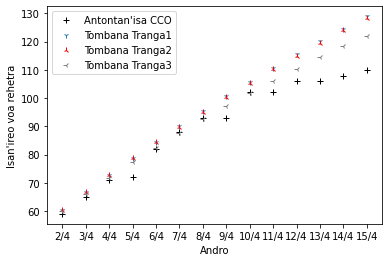

In [4]:
NT = 2e6
N10 = 1e4
N1 = 1e3

ST = NT - 54
S10 = N10 - 54
S1 = N1 - 54

ST3 = NT - 54
S103 = N10 - 54
S13 = N1 - 54

ItotT = 54
IvT = 4
IT = 54 # mbola tsy nisy sitrana hatreo

ItotT_lst = []
IvT_lst = []

Itot10 = 54
Iv10 = 4
I10 = 54 

Itot10_lst = []
Iv10_lst = []

Itot1 = 54
Iv1 = 4
I1 = 54 

Itot1_lst = []
Iv1_lst = []

ItotT3 = 54
IvT3 = 4
IT3 = 54 

ItotT3_lst = []
IvT3_lst = []

Itot103 = 54
Iv103 = 4
I103 = 54 

Itot103_lst = []
Iv103_lst = []

Itot13 = 54
Iv13 = 4
I13 = 54 

Itot13_lst = []
Iv13_lst = []

lc = 0.12
mc = 0.15

l3 = 0.45
m3 = 0.15

daty_lav = datetime.date(2020,4,1)
formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_lst = []


for el in range(14):
  daty_lav =  daty_lav + datetime.timedelta(days = 1)
  daty = formatf_date(daty_lav)
  daty_lst.append(daty)

  IvT = (lc/NT)*ST*IT
  ST = ST - (lc/NT)*IT
  IT = IT + IvT - mc*IT
  ItotT = ItotT + IvT
  
  ItotT_lst.append(round(ItotT, 2))
  IvT_lst.append(round(IvT, 2))
  
  Iv10 = (lc/N10)*S10*I10
  S10 = S10 - (lc/N10)*I10
  I10 = I10 + Iv10 - mc*I10
  Itot10 = Itot10 + Iv10 

  Itot10_lst.append(round(Itot10, 2))
  Iv10_lst.append(round(Iv10, 2))

  Iv1 = (lc/N1)*S1*I1
  S1 = S1 - (lc/N1)*I1
  I1 = I1 + Iv1 - mc*I1
  Itot1 = Itot1 + Iv1 

  Itot1_lst.append(round(Itot1, 2))
  Iv1_lst.append(round(Iv1, 2))

  IvT3 = (l3/NT)*ST3*IT3
  ST3 = ST3 - (l3/NT)*IT3
  IT3 = IT3 + IvT3 - m3*IT3
  ItotT3 = ItotT3 + IvT3

  ItotT3_lst.append(round(ItotT3, 2))
  IvT3_lst.append(round(IvT3, 2))

  Iv103 = (l3/N10)*S103*I103
  S103 = S103 - (l3/N10)*I103
  I103 = I103 + Iv103 - m3*I103
  Itot103 = Itot103 + Iv103 

  Itot103_lst.append(round(Itot103, 2))
  Iv103_lst.append(round(Iv103, 2))

  Iv13 = (l3/N1)*S13*I13
  S13 = S13 - (l3/N1)*I13
  I13 = I13 + Iv13 - m3*I13
  Itot13 = Itot13 + Iv13

  Itot13_lst.append(round(Itot13, 2))
  Iv13_lst.append(round(Iv13, 2))

 # print(daty, round(ItotT, 2), '&', round(IvT, 2), '&', round(Itot10, 2), '&', round(Iv10, 2), '&', round(Itot1, 2), '&', round(Iv1, 2), '&', round(ItotT3, 2), '&', round(IvT3, 2), '&', round(Itot103, 2), '&', round(Iv103, 2), '&', round(Itot13, 2), '&', round(Iv13, 2))
#print('ItotT :', ItotT_lst, sep=" ")

plt.figure()
plt.plot(daty_lst, cco_tot_lst, marker ="+",ls = 'None', color='black',label="Antontan'isa CCO")
plt.plot(daty_lst,ItotT_lst, "1", ls = 'None', label='Tombana Tranga1')
plt.plot(daty_lst,Itot10_lst, marker ="2",ls = 'None', color='red',label='Tombana Tranga2')
plt.plot(daty_lst,Itot1_lst, marker = "3", ls = 'None', color='grey', label='Tombana Tranga3')
plt.xlabel('Andro')
plt.ylabel("Isan'ireo voa rehetra")
plt.legend(loc= 'best')
#plt.suptitle("Fivoarana raha R0 omen'ny antontan'isa CCO")
plt.savefig(path_to_save+'R0ccoSIRmiv.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


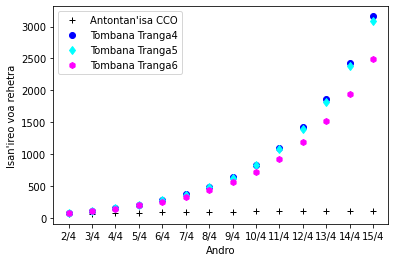

In [20]:
plt.figure()
plt.plot(daty_lst, cco_tot_lst, marker ="+",ls = 'None', color='black',label="Antontan'isa CCO")
plt.plot(daty_lst,ItotT3_lst, "o", ls = 'None', color='blue', label='Tombana Tranga4')
plt.plot(daty_lst,Itot103_lst, marker ="d",ls = 'None', color='cyan',label='Tombana Tranga5')
plt.plot(daty_lst,Itot13_lst, marker = "h", ls = 'None', color='fuchsia', label='Tombana Tranga6')
plt.xlabel('Andro')
plt.ylabel("Isan'ireo voa rehetra")
plt.legend(loc= 'best')
#plt.suptitle("Fivoarana raha R0 = 3 (R0 = 3,41 hoan'i Germany t@ 1-15/03)")
plt.savefig(path_to_save+'R03SIRmiv.eps')

In [0]:
tilyvoafar = tilyvoa.groupby('Faritra')
tilyvoamdg = tilyvoafar.get_group('Madagasikara')
tilyvoamdg.set_index('Daty', inplace=True)
tilyvoamdg.index = pd.to_datetime(tilyvoamdg.index)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


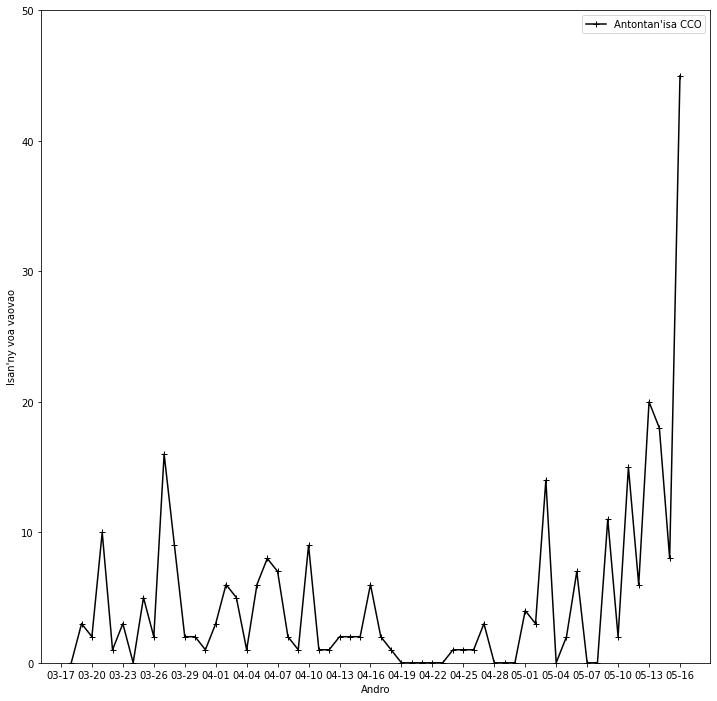

In [23]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.index, tilyvoamdg['Voatomb'], marker ="+", color='black',label="Antontan'isa CCO")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,50)
plt.savefig(path_to_save+'voavaozao.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


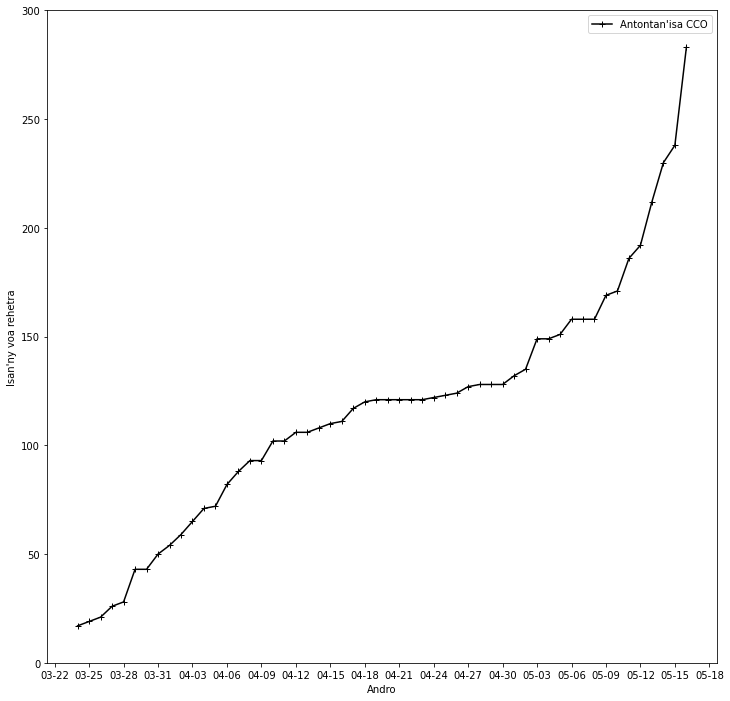

In [25]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.index, tilyvoamdg['Voareh tvm'], marker ="+", color='black',label="Antontan'isa CCO")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa rehetra")

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,300)
plt.savefig(path_to_save+'voarehzao.eps')

plt.show()